# imports

In [1]:
import sys
sys.path.append('../src/')

from collections import OrderedDict
import torch

from data import get_loader
from filters import kalman_filter
from models import MLP
from utils import draw_weights, init_model, plot_density, plot_training, validate

# config

In [2]:
batch_size = 256
dataset = 'mnist'
epochs = 20
hidden_size = [1024, 512, 256]
# hidden_size = [128]
learning_rate = 1e-1
log_intv = 50
init = 'uniform'

device = torch.device('cuda:0')

# dataloader and model

In [3]:
trainloader = get_loader(dataset, batch_size, train=True)
testloader = get_loader(dataset, batch_size, train=False)

model = MLP(hidden_size=hidden_size).to(device)
init_model(model, init=init)

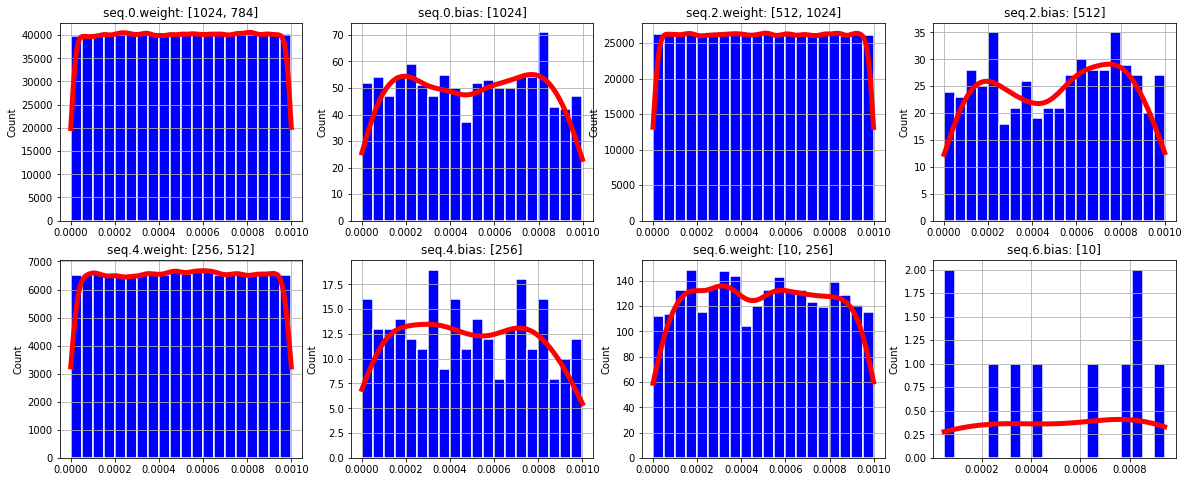

In [4]:
plot_density(model, bins=20)

# training

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

- $\mu_k(0)$ and $\sigma_k(0)$ is initialized for the model
- Also, initialize estimate covariances $P_{\mu}(0)$ and $P_{\sigma}(0)$
- Initialize small values of $\sigma_{\mu}$, $\tilde{\sigma}_{\mu}$, $\sigma_{\sigma}$, $\tilde{\sigma}_{\sigma}$

In [6]:
std_mu = 1e-1
std_mu_ = 1e-1
std_var = 1e-1
std_var_ = 1e-1

In [7]:
model_mu = OrderedDict()
model_var = OrderedDict()
P_mu = OrderedDict()
P_var = OrderedDict()

for name, param in model.named_parameters():
    model_mu[name] = torch.zeros(param.size())
    model_var[name] = torch.ones(param.size())*(0.01**2)
    
    P_mu[name] = torch.zeros(param.size())
    P_var[name] = torch.zeros(param.size())

[epoch:   1, batch:    0] loss: 2.302572 	 acc: 0.10
[epoch:   1, batch:   50] loss: 2.302082 	 acc: 0.11
[epoch:   1, batch:  100] loss: 2.300167 	 acc: 0.12
[epoch:   1, batch:  150] loss: 2.286698 	 acc: 0.17
[epoch:   1, batch:  200] loss: 2.113085 	 acc: 0.21


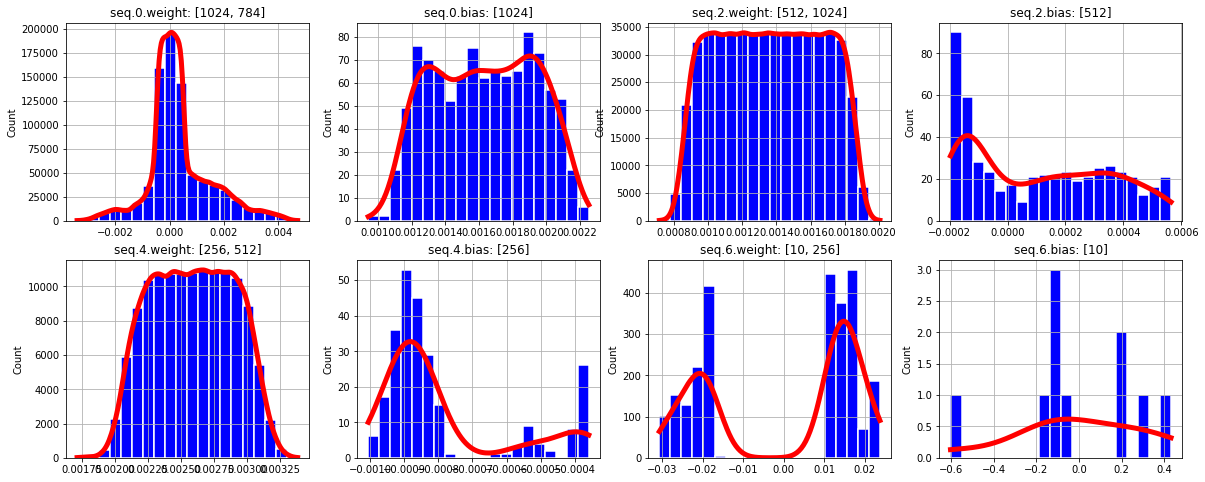

[epoch:   2, batch:    0] loss: 1.935544 	 acc: 0.27
[epoch:   2, batch:   50] loss: 1.904739 	 acc: 0.24
[epoch:   2, batch:  100] loss: 1.841226 	 acc: 0.26
[epoch:   2, batch:  150] loss: 1.790699 	 acc: 0.27
[epoch:   2, batch:  200] loss: 1.738591 	 acc: 0.28


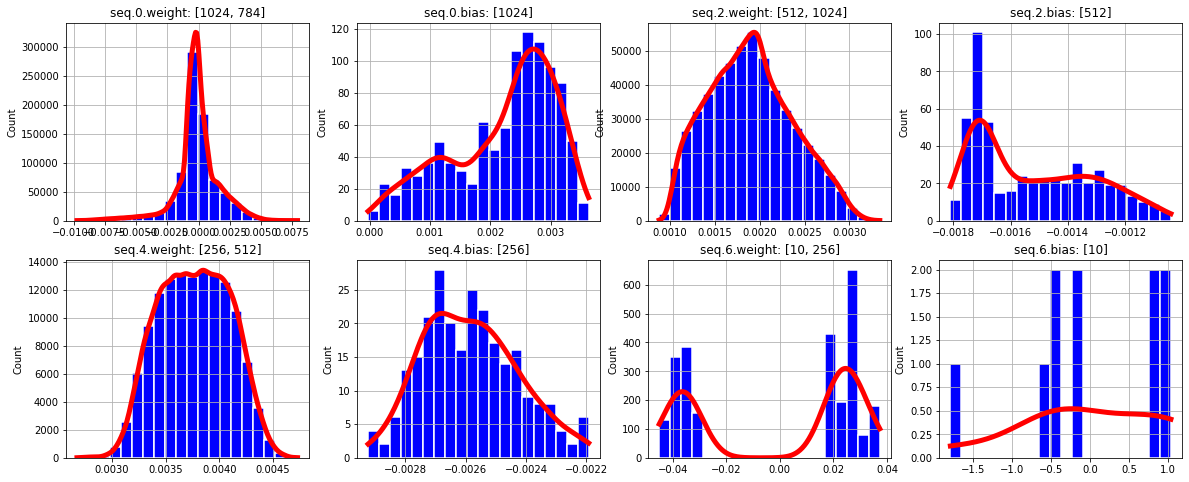

[epoch:   3, batch:    0] loss: 1.706101 	 acc: 0.32
[epoch:   3, batch:   50] loss: 1.671636 	 acc: 0.30
[epoch:   3, batch:  100] loss: 1.646832 	 acc: 0.31
[epoch:   3, batch:  150] loss: 1.621590 	 acc: 0.32
[epoch:   3, batch:  200] loss: 1.599400 	 acc: 0.32


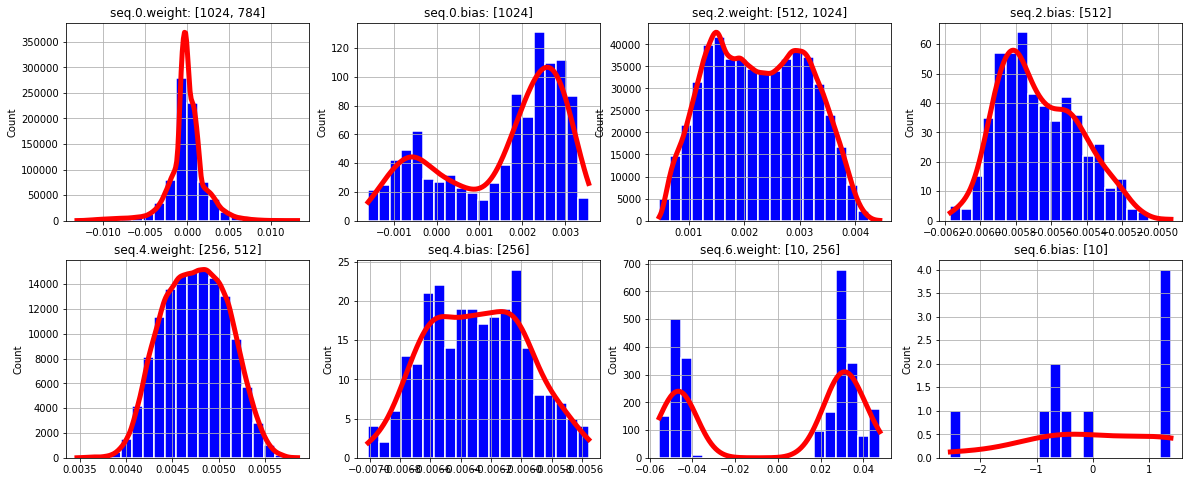

[epoch:   4, batch:    0] loss: 1.612695 	 acc: 0.32
[epoch:   4, batch:   50] loss: 1.570411 	 acc: 0.34
[epoch:   4, batch:  100] loss: 1.553579 	 acc: 0.34
[epoch:   4, batch:  150] loss: 1.530291 	 acc: 0.34
[epoch:   4, batch:  200] loss: 1.518998 	 acc: 0.36


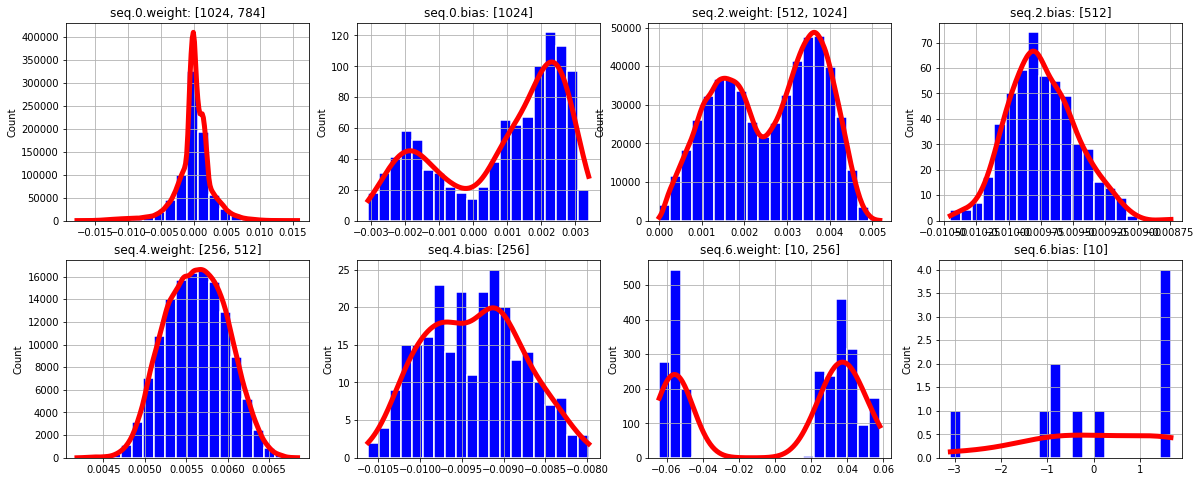

[epoch:   5, batch:    0] loss: 1.515021 	 acc: 0.33
[epoch:   5, batch:   50] loss: 1.505075 	 acc: 0.37
[epoch:   5, batch:  100] loss: 1.486152 	 acc: 0.37
[epoch:   5, batch:  150] loss: 1.472038 	 acc: 0.38
[epoch:   5, batch:  200] loss: 1.446106 	 acc: 0.38


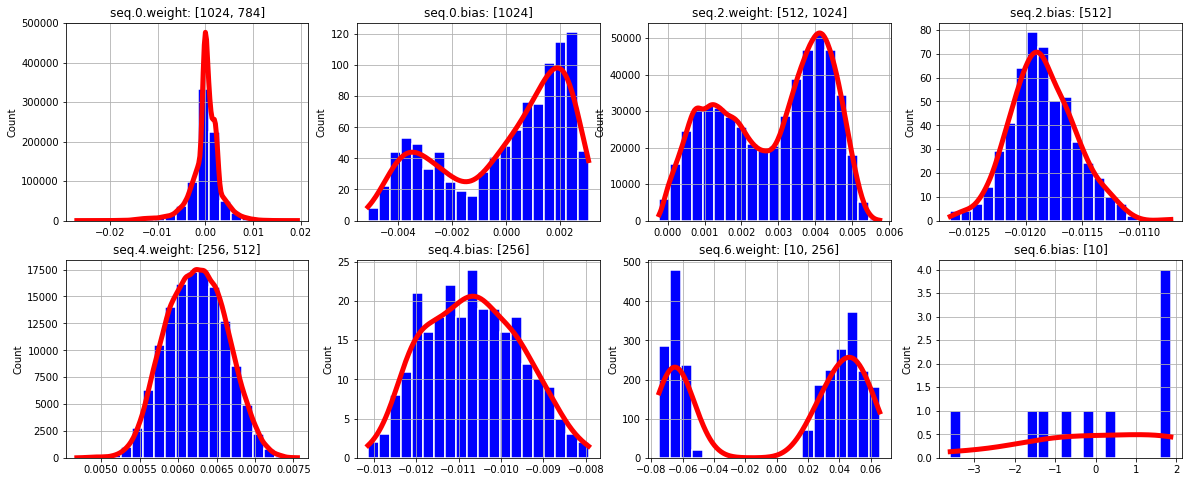

[epoch:   6, batch:    0] loss: 1.406143 	 acc: 0.40
[epoch:   6, batch:   50] loss: 1.439613 	 acc: 0.38
[epoch:   6, batch:  100] loss: 1.418616 	 acc: 0.40
[epoch:   6, batch:  150] loss: 1.456884 	 acc: 0.38
[epoch:   6, batch:  200] loss: 1.419529 	 acc: 0.40


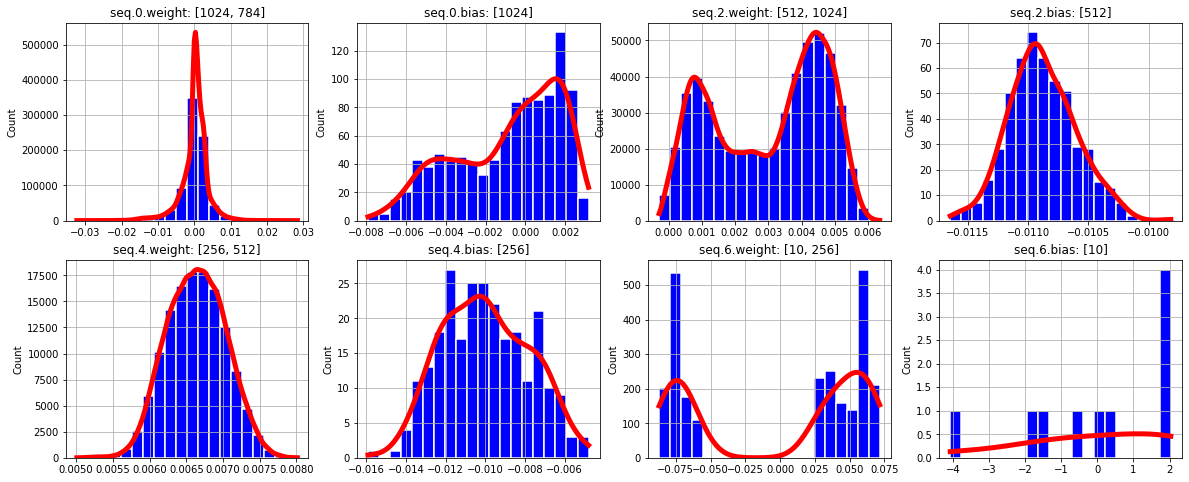

[epoch:   7, batch:    0] loss: 1.383727 	 acc: 0.43
[epoch:   7, batch:   50] loss: 1.386366 	 acc: 0.41
[epoch:   7, batch:  100] loss: 1.453516 	 acc: 0.38
[epoch:   7, batch:  150] loss: 1.377151 	 acc: 0.42
[epoch:   7, batch:  200] loss: 1.372985 	 acc: 0.42


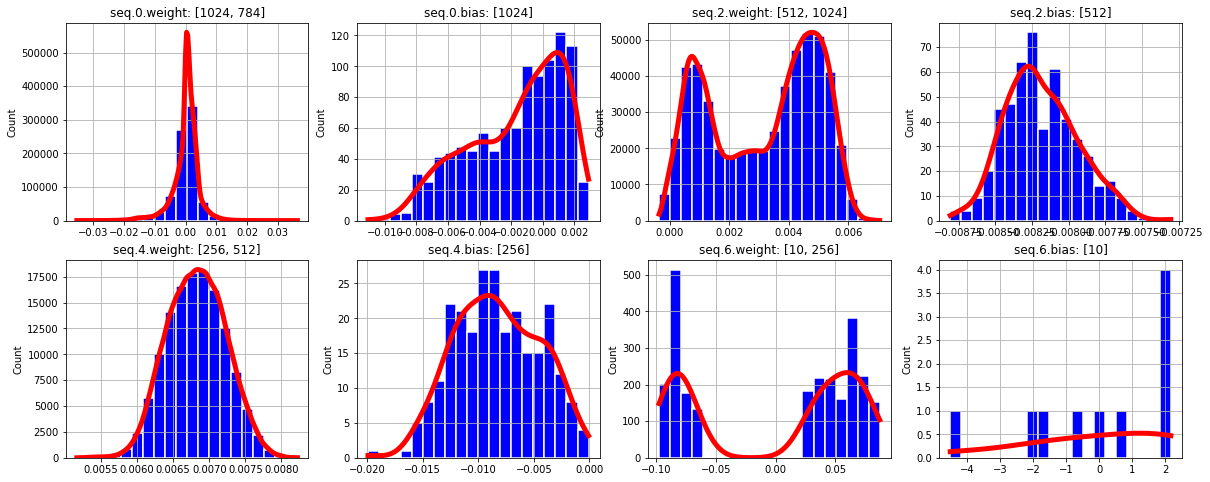

[epoch:   8, batch:    0] loss: 1.356984 	 acc: 0.45
[epoch:   8, batch:   50] loss: 1.335256 	 acc: 0.44
[epoch:   8, batch:  100] loss: 1.347298 	 acc: 0.44
[epoch:   8, batch:  150] loss: 1.351338 	 acc: 0.43
[epoch:   8, batch:  200] loss: 1.370905 	 acc: 0.42


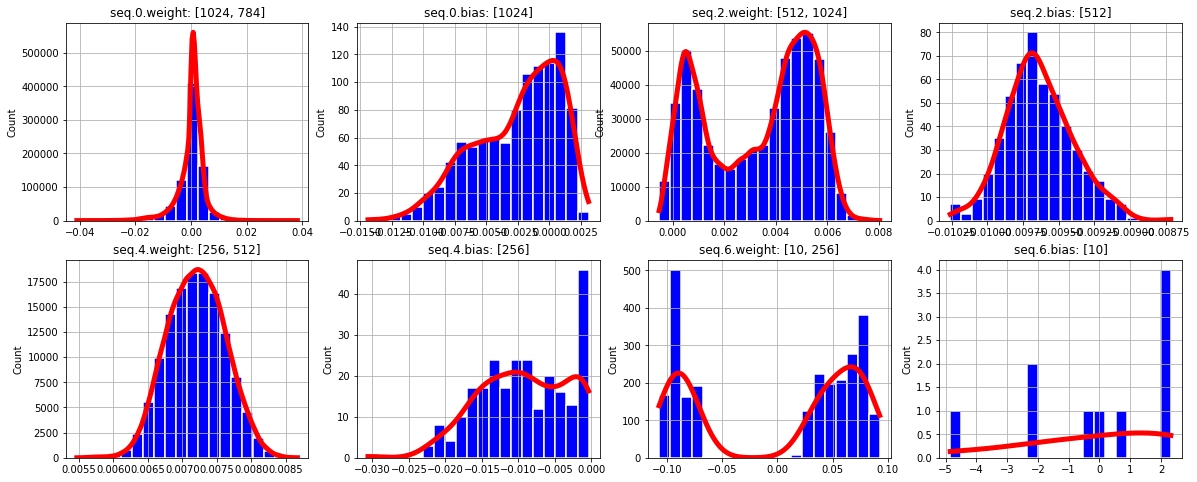

[epoch:   9, batch:    0] loss: 1.353678 	 acc: 0.43
[epoch:   9, batch:   50] loss: 1.317922 	 acc: 0.45
[epoch:   9, batch:  100] loss: 1.315544 	 acc: 0.43
[epoch:   9, batch:  150] loss: 1.330359 	 acc: 0.43
[epoch:   9, batch:  200] loss: 1.293481 	 acc: 0.45


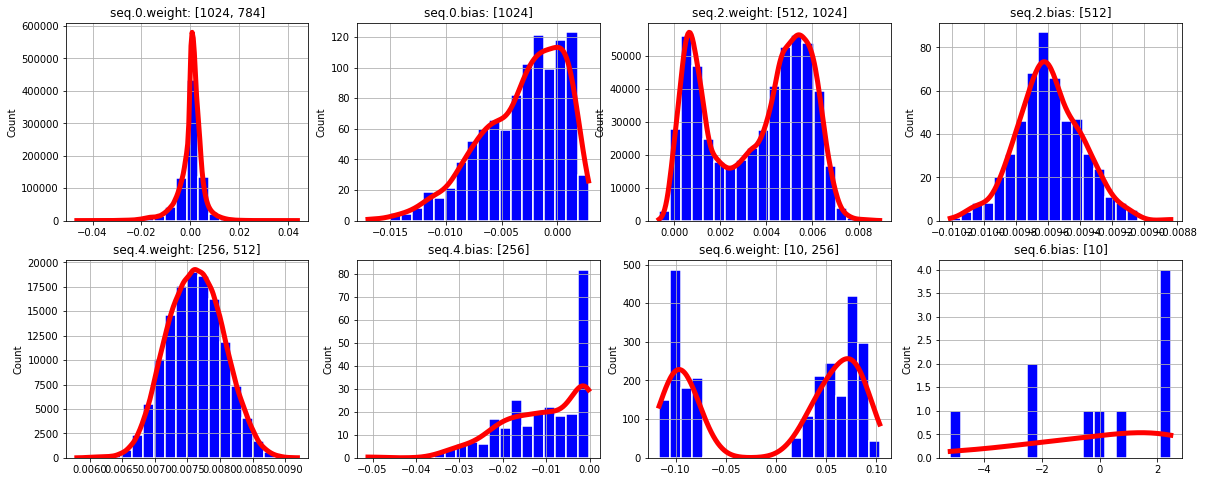

[epoch:  10, batch:    0] loss: 1.263861 	 acc: 0.46
[epoch:  10, batch:   50] loss: 1.299664 	 acc: 0.46
[epoch:  10, batch:  100] loss: 1.270223 	 acc: 0.47
[epoch:  10, batch:  150] loss: 1.297685 	 acc: 0.44
[epoch:  10, batch:  200] loss: 1.297430 	 acc: 0.43


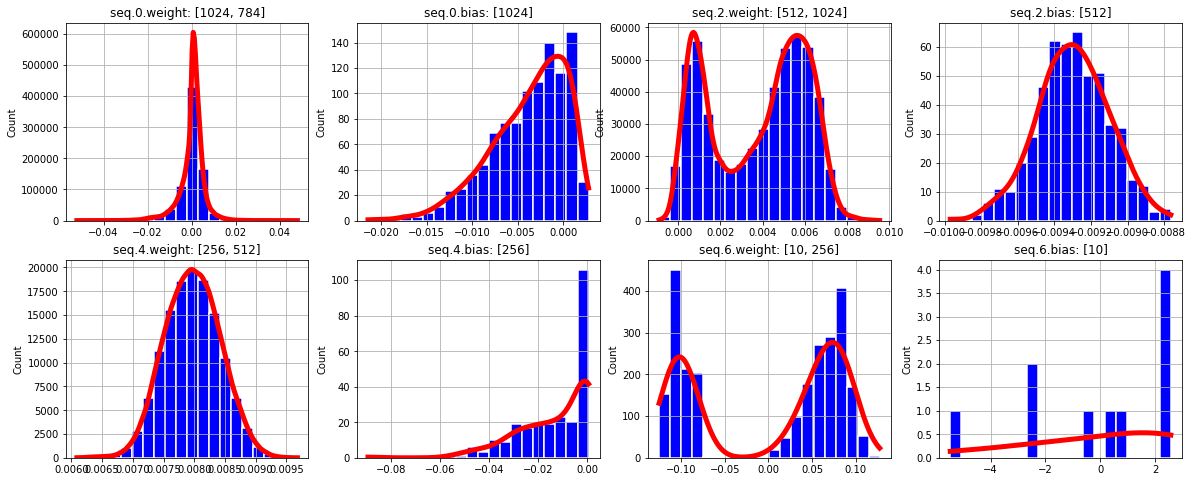

[epoch:  11, batch:    0] loss: 1.362503 	 acc: 0.36
[epoch:  11, batch:   50] loss: 1.283197 	 acc: 0.45
[epoch:  11, batch:  100] loss: 1.260197 	 acc: 0.47
[epoch:  11, batch:  150] loss: 1.257963 	 acc: 0.46
[epoch:  11, batch:  200] loss: 1.278908 	 acc: 0.45


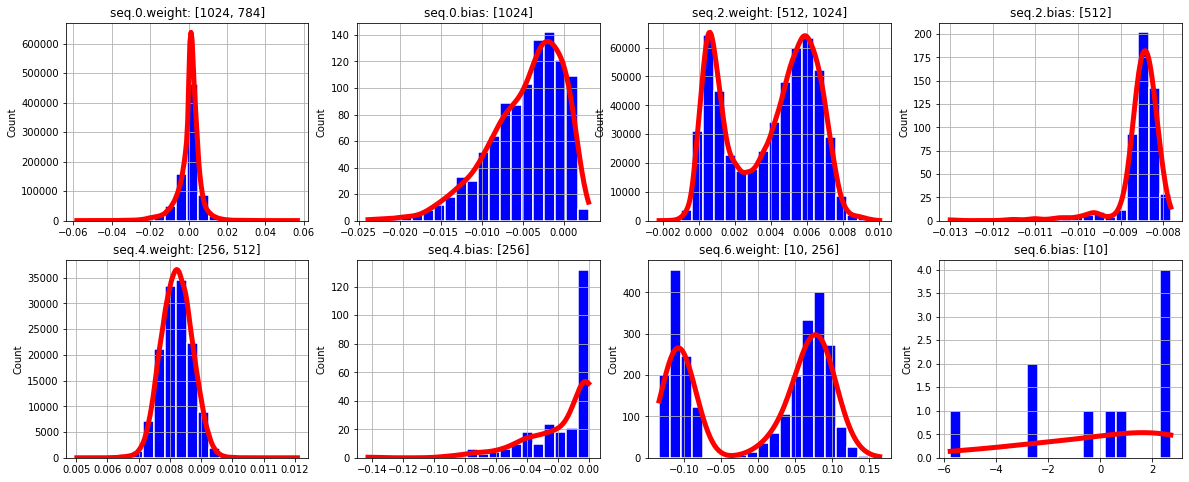

[epoch:  12, batch:    0] loss: 1.293502 	 acc: 0.43
[epoch:  12, batch:   50] loss: 1.226797 	 acc: 0.48
[epoch:  12, batch:  100] loss: 1.272216 	 acc: 0.47
[epoch:  12, batch:  150] loss: 1.216406 	 acc: 0.50
[epoch:  12, batch:  200] loss: 1.250512 	 acc: 0.48


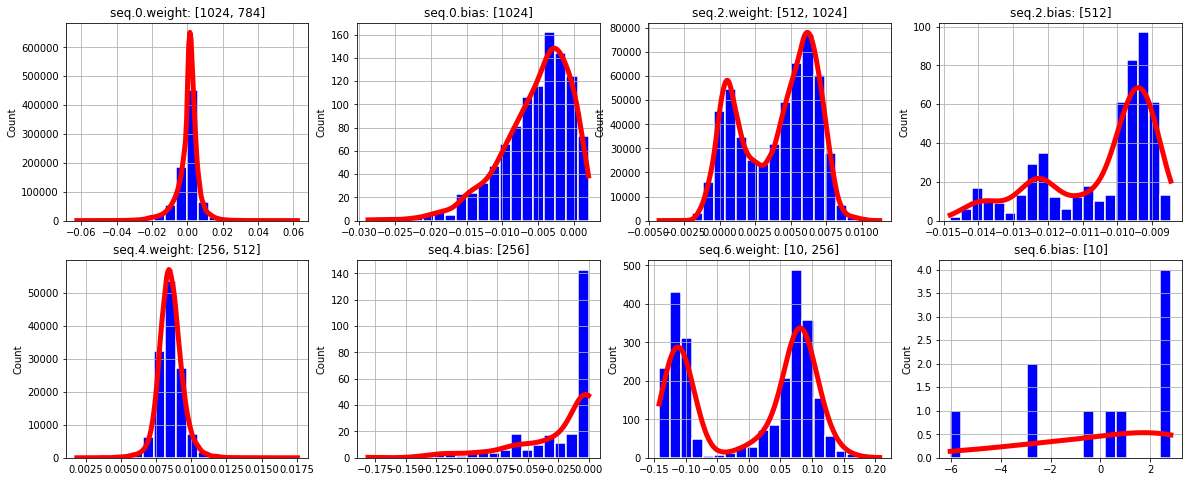

[epoch:  13, batch:    0] loss: 1.188287 	 acc: 0.47
[epoch:  13, batch:   50] loss: 1.194509 	 acc: 0.50
[epoch:  13, batch:  100] loss: 1.186951 	 acc: 0.50
[epoch:  13, batch:  150] loss: 1.175516 	 acc: 0.53
[epoch:  13, batch:  200] loss: 1.177713 	 acc: 0.51


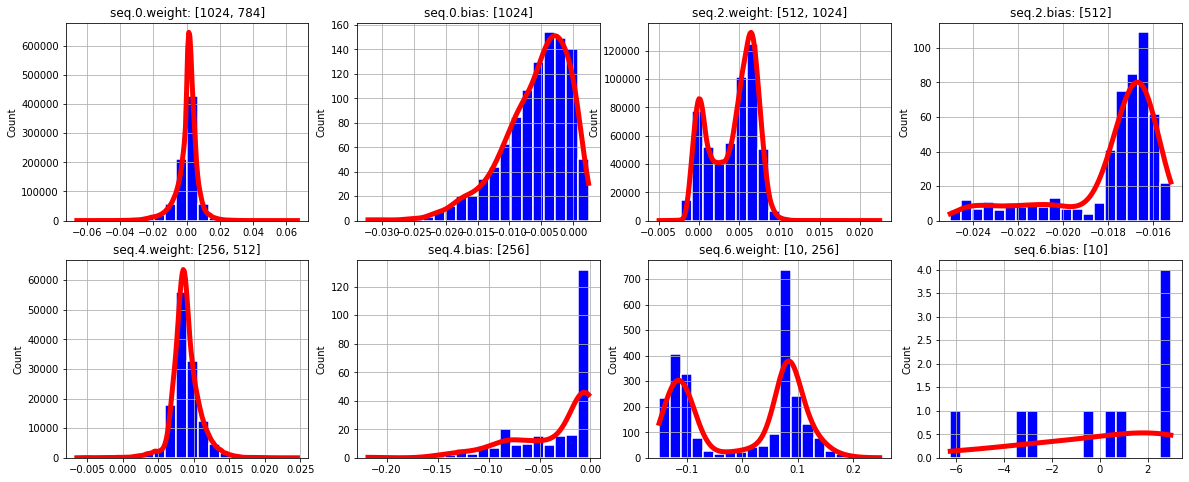

[epoch:  14, batch:    0] loss: 1.219645 	 acc: 0.49
[epoch:  14, batch:   50] loss: 1.152089 	 acc: 0.52
[epoch:  14, batch:  100] loss: 1.114149 	 acc: 0.55
[epoch:  14, batch:  150] loss: 1.064938 	 acc: 0.59
[epoch:  14, batch:  200] loss: 0.975488 	 acc: 0.62


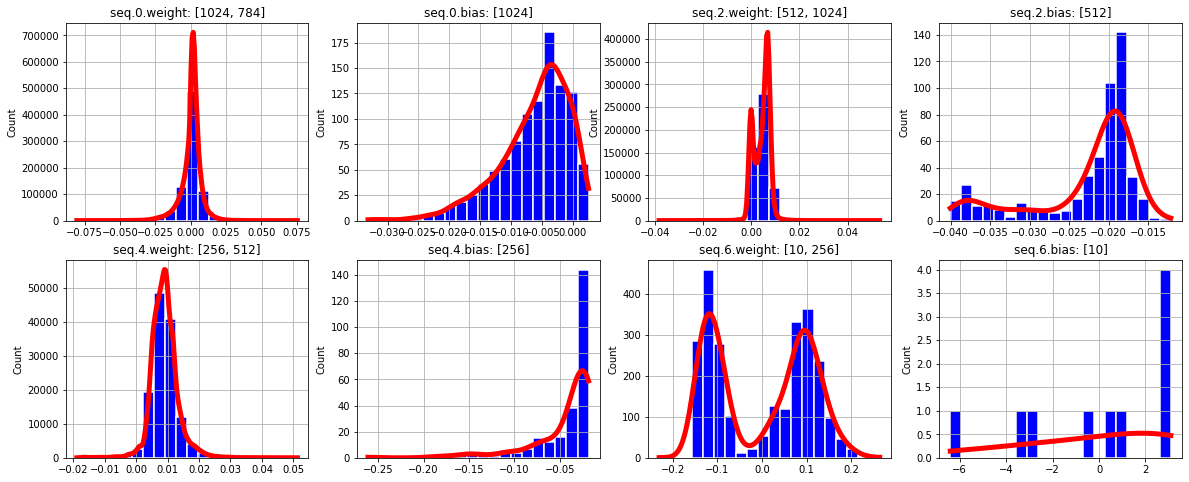

[epoch:  15, batch:    0] loss: 0.972999 	 acc: 0.63
[epoch:  15, batch:   50] loss: 0.857577 	 acc: 0.66
[epoch:  15, batch:  100] loss: 0.837593 	 acc: 0.68
[epoch:  15, batch:  150] loss: 0.785076 	 acc: 0.72
[epoch:  15, batch:  200] loss: 0.748423 	 acc: 0.73


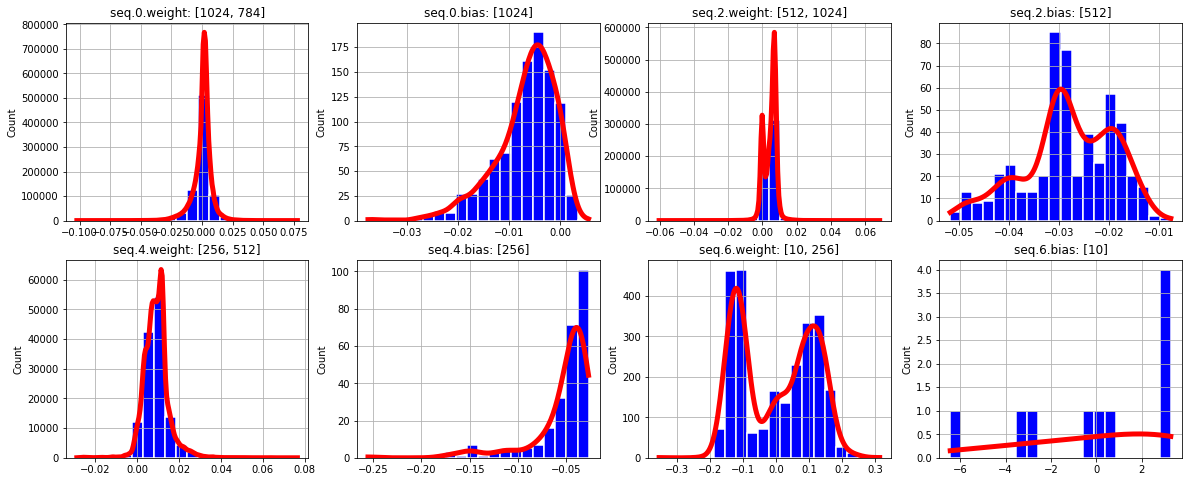

[epoch:  16, batch:    0] loss: 0.649312 	 acc: 0.76
[epoch:  16, batch:   50] loss: 0.673340 	 acc: 0.75
[epoch:  16, batch:  100] loss: 0.633316 	 acc: 0.76
[epoch:  16, batch:  150] loss: 0.607023 	 acc: 0.77
[epoch:  16, batch:  200] loss: 0.588053 	 acc: 0.79


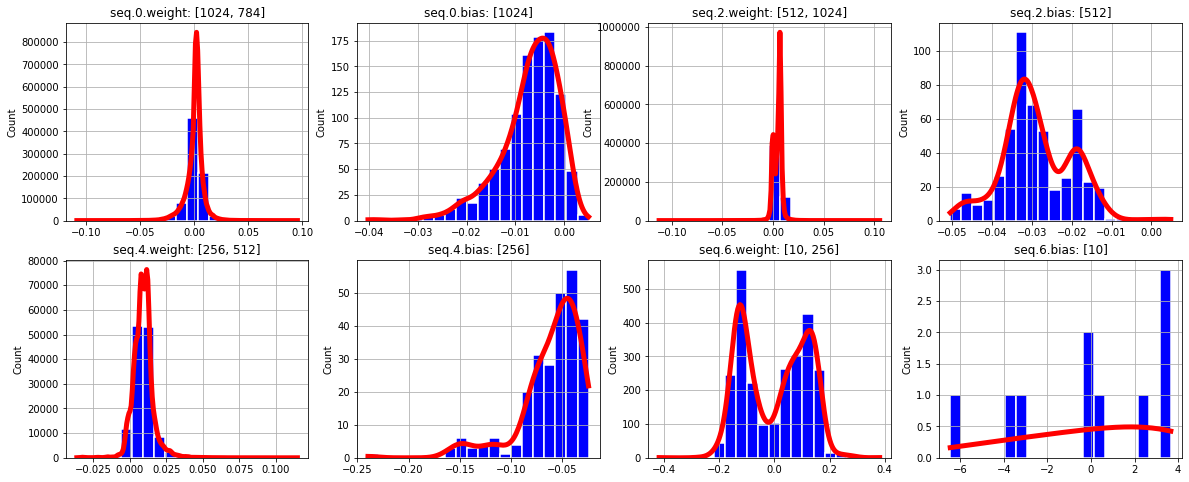

[epoch:  17, batch:    0] loss: 0.559311 	 acc: 0.82
[epoch:  17, batch:   50] loss: 0.501498 	 acc: 0.85
[epoch:  17, batch:  100] loss: 0.471310 	 acc: 0.86
[epoch:  17, batch:  150] loss: 0.435964 	 acc: 0.86
[epoch:  17, batch:  200] loss: 0.378698 	 acc: 0.87


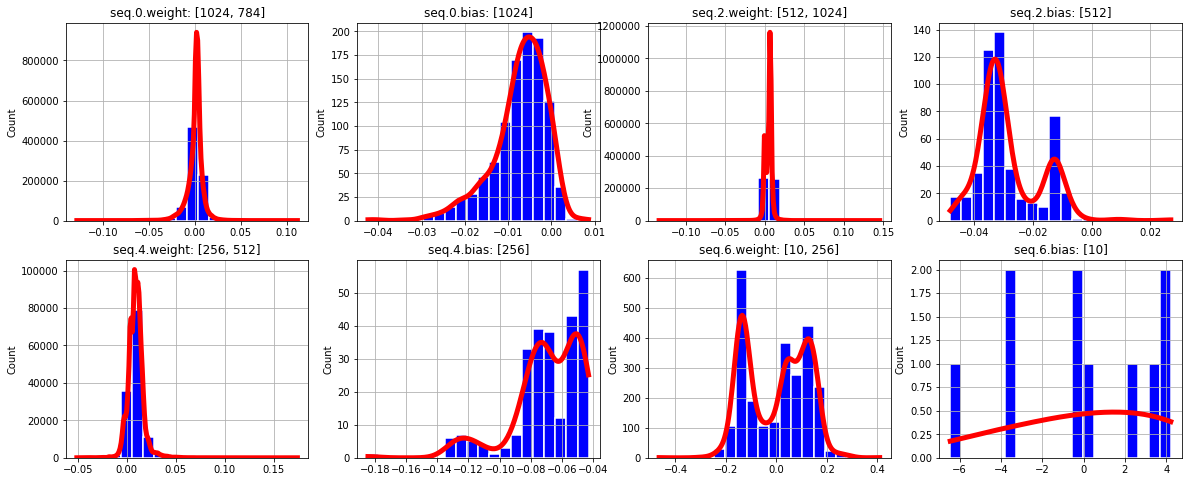

[epoch:  18, batch:    0] loss: 0.259063 	 acc: 0.89
[epoch:  18, batch:   50] loss: 0.302149 	 acc: 0.89
[epoch:  18, batch:  100] loss: 0.295429 	 acc: 0.89
[epoch:  18, batch:  150] loss: 0.279759 	 acc: 0.92
[epoch:  18, batch:  200] loss: 0.250936 	 acc: 0.97


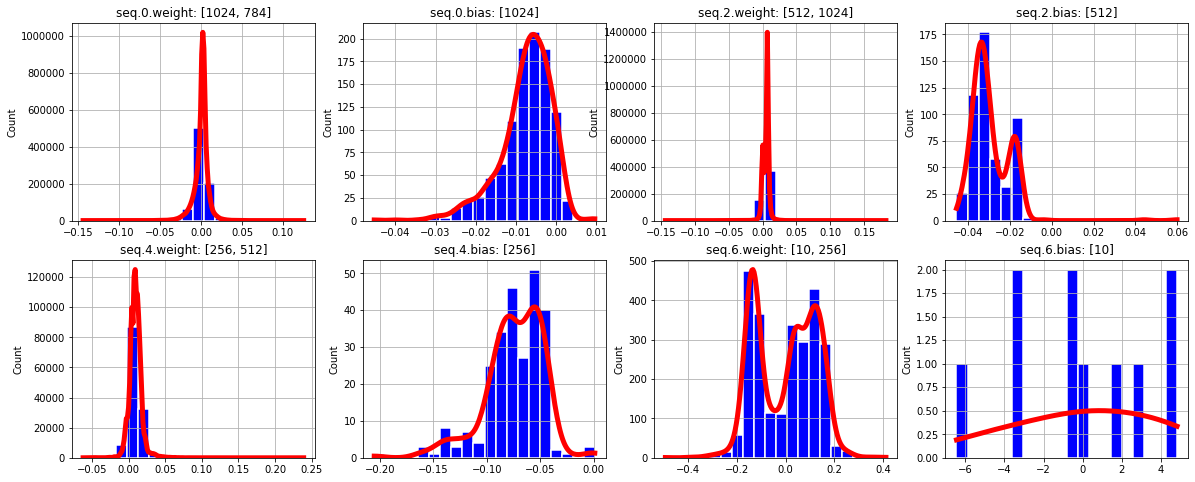

[epoch:  19, batch:    0] loss: 0.248497 	 acc: 0.96
[epoch:  19, batch:   50] loss: 0.183067 	 acc: 0.98
[epoch:  19, batch:  100] loss: 0.152878 	 acc: 0.98
[epoch:  19, batch:  150] loss: 0.134417 	 acc: 0.98
[epoch:  19, batch:  200] loss: 0.117167 	 acc: 0.98


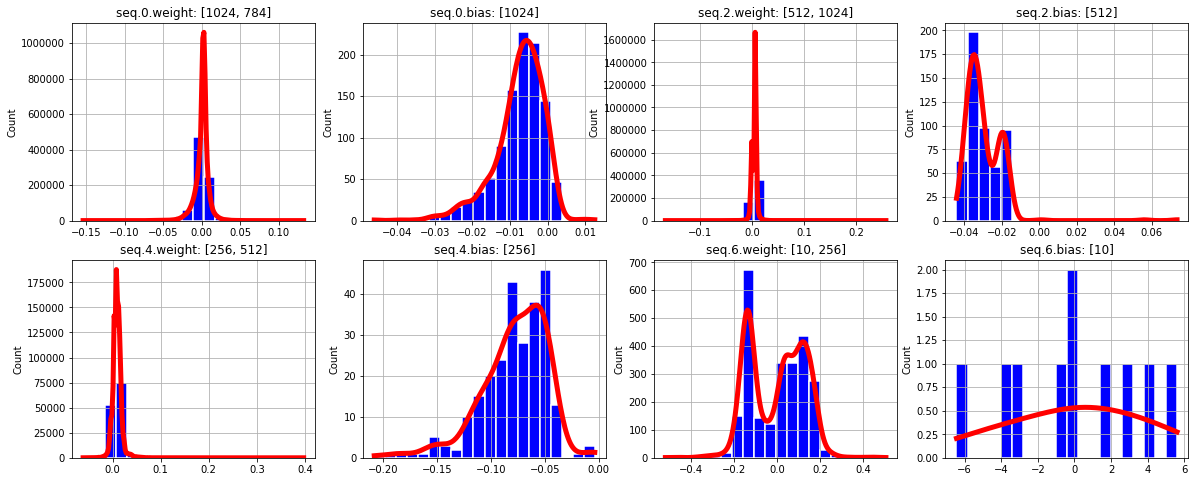

[epoch:  20, batch:    0] loss: 0.147373 	 acc: 0.97
[epoch:  20, batch:   50] loss: 0.089491 	 acc: 0.98
[epoch:  20, batch:  100] loss: 0.093621 	 acc: 0.98
[epoch:  20, batch:  150] loss: 0.083987 	 acc: 0.98
[epoch:  20, batch:  200] loss: 0.076227 	 acc: 0.98


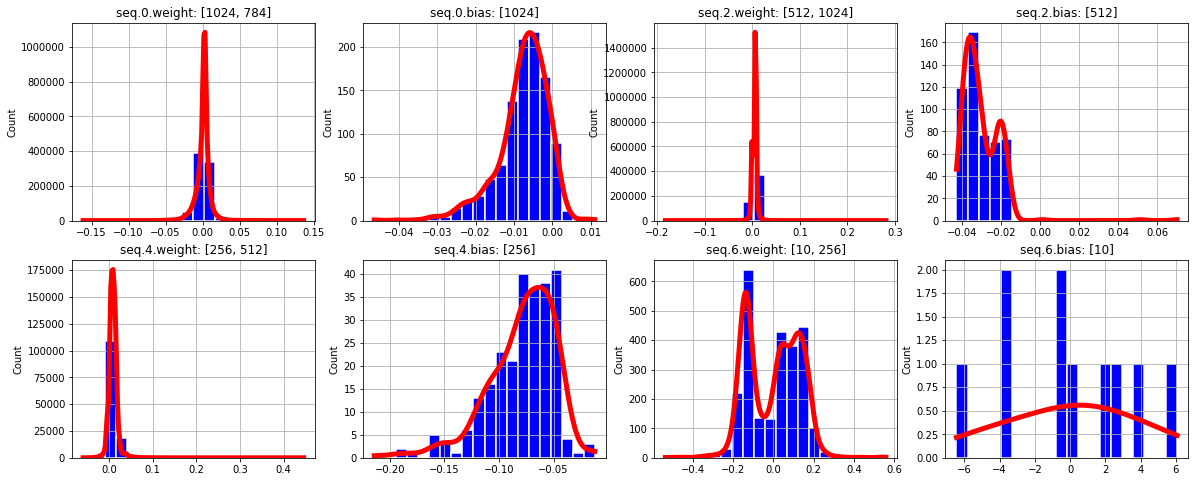

In [8]:
h_epoch, h_acc, h_loss = [], [], []
for epoch in range(1, epochs+1):
    
    running_loss = 0.0
    running_acc = 0.0
    running_count = 0
    epoch_loss = 0
    epoch_acc = 0
    for i, (Y, X) in enumerate(trainloader):
        Y, X = Y.to(device), X.to(device)
        
        X_ = model(Y)
        loss = loss_fn(X_, X)
        running_loss += loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
        pred = X_.argmax(axis=1, keepdim=True)
        running_acc += pred.eq(X.view_as(pred)).sum().item()/len(X)
        running_count += 1
        
        # logging
        if i % log_intv == 0:
            epoch_loss = running_loss/running_count
            epoch_acc = running_acc/running_count
            print('[epoch: {:3d}, batch: {:4d}] loss: {:.6f} \t acc: {:.2f}'.format(
                epoch, i, epoch_loss, epoch_acc))
            running_loss = 0.0
            running_acc = 0.0
            running_count = 0
            
        # kalman filtering
        model_mu, model_var, P_mu, P_var = kalman_filter(
            model, learning_rate, 
            model_mu, model_var, P_mu, P_var,
            std_mu, std_mu_, std_var, std_var_
        )
    h_epoch.append(epoch)
    h_acc.append(epoch_acc)
    h_loss.append(epoch_loss)
    plot_density(model, bins=20)

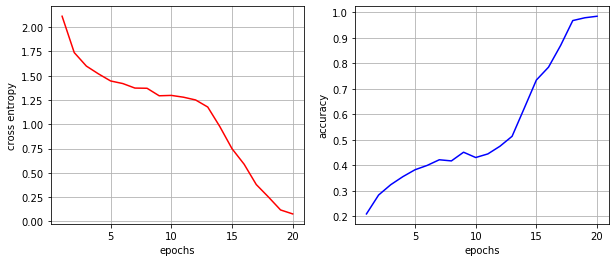

In [9]:
plot_training(h_epoch, h_acc, h_loss)

# validate training

In [10]:
validate(model, testloader, device)

0.9608

# draw model

In [11]:
drawn_weights = draw_weights(model_mu, model_var, device)
drawn_model = MLP(hidden_size=hidden_size).to(device)
drawn_model.load_state_dict(drawn_weights)

<All keys matched successfully>

In [12]:
validate(drawn_model, testloader, device)

0.9634